### Treść zadania

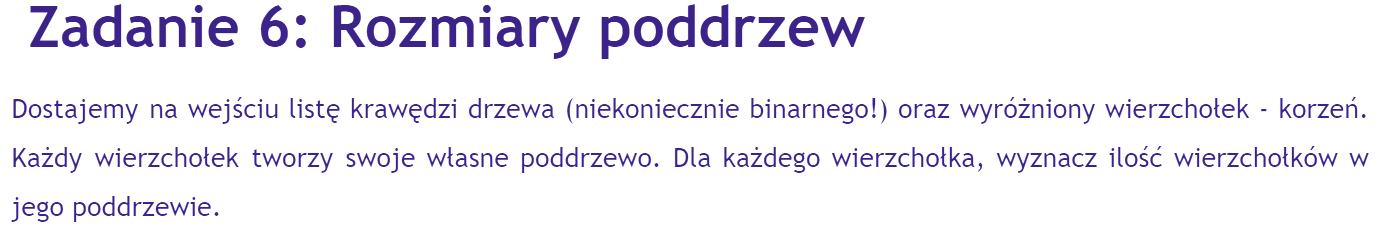

### Omówienie algorytmu

Używamy zwykłego algorytmu DFS i po odwiedzeniu każdego z wierzchołków, wyznaczamy liczbę wierzchołków w danym poddrzewie jako rekurencyjne wyznaczenie sumy liczb wierzchołków w poddrzewach jego dzieci + 1 (bo wliczamy ten wierzchołek - roota).

### Złożoność

###### Obliczeniowa:
$ O(n) $, gdzie $ n $ - liczba wierzchołków w drzewie
###### Pamięciowa:
$ O(n) $ - bo dla każdego węzła/wierzchołka zapisujemy liczbę węzłów/wierzchołków w jego poddrzewie

### Implementacja #1
##### (Dla obiektowej reprezentacji drzewa)

In [1]:
class Tree:
    def __init__(self, children=[]):
        self.children = children
        

def count_vertices(root: 'root of a tree'):
    def dfs(node):
        node.count = sum(dfs(child) for child in node.children) + 1
        print(node.count)
        return node.count
        
    dfs(root)
    
    return root.count

###### Kilka testów

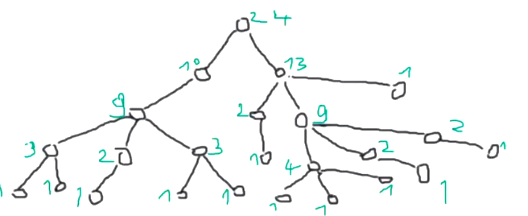

In [2]:
root = Tree([
    Tree([
        Tree([
            Tree([
                Tree(),
                Tree()
            ]),
            Tree([
                Tree()
            ]),
            Tree([
                Tree(),
                Tree()
            ])
        ])
    ]),
    Tree([
        Tree([
            Tree()
        ]),
        Tree([
            Tree([
                Tree(),
                Tree(),
                Tree()
            ]),
            Tree([
                Tree()
            ]),
            Tree([
                Tree()
            ])
        ]),
        Tree()
    ])
])

res = count_vertices(root)
print('\nRoot subtree size:', res)

1
1
3
1
2
1
1
3
9
10
1
2
1
1
1
4
1
2
1
2
9
1
13
24

Root subtree size: 24


### Implementacja #2
##### (Dla reprezentacji drzewa w postaci zwykłego grafu nieskierowanego)

In [3]:
def subtrees_sizes(T: 'tree represented with adjacency lists', root: 'root vertex'):
    n = len(T)
    sizes = [0] * n
    parents = [None] * n
    
    def recur(u):
        if not sizes[u]:
            count = 1
            for v in G[u]:
                if v != parents[u]:
                    parents[v] = u
                    count += recur(v)
            sizes[u] = count
        return sizes[u]
    
    recur(root)
    
    return sizes

###### Kilka testów

*Pomocnicze*

In [4]:
def undirected_graph_list(E: 'array of edges'):
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

Te żółte to są indeksy wierzchołków:
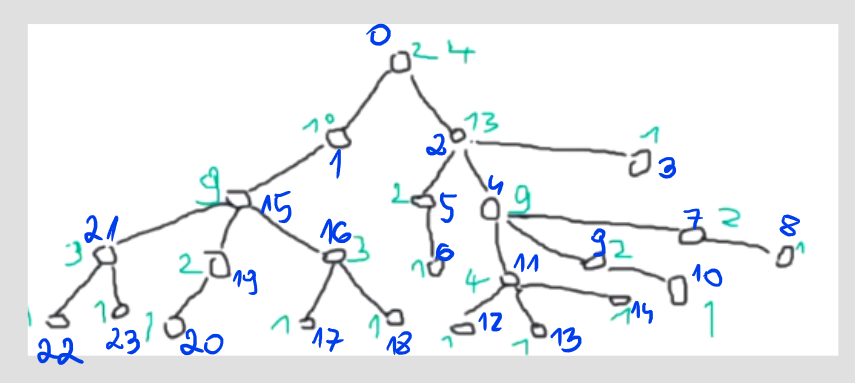

In [5]:
E = [(0, 1), (1, 15), (15, 16), (16, 17), (16, 18), (15, 19), (19, 20), (15, 21), (21, 22), (21, 23),
     (0, 2), (2, 5), (5, 6), (2, 4), (2, 3), (4, 7), (7, 8), (4, 9), (9, 10), (4, 11), (11, 12),
     (11, 13), (11, 14)]
G = undirected_graph_list(E)

print(subtrees_sizes(G, 0))

[24, 10, 13, 1, 9, 2, 1, 2, 1, 2, 1, 4, 1, 1, 1, 9, 3, 1, 1, 2, 1, 3, 1, 1]
